In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. linear_model import LinearRegression
from sklearn. model_selection import train_test_split
from sklearn. metrics import r2_score
from sklearn. feature_selection import RFE

LOGISTIC REGRESSSION


In [ ]:
test_df = pd.read_csv('/content/Titanic_test.csv')
train_df = pd.read_csv('/content/Titanic_train.csv')

DATA EXPLOTATIN :


In [ ]:
pd.read_csv('/content/Titanic_train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#summary atatistic
print(train_df.describe(include='all'))
print(test_df.describe(include='all'))

        PassengerId    Survived      Pclass  ...        Fare Cabin  Embarked
count    891.000000  891.000000  891.000000  ...  891.000000   204       889
unique          NaN         NaN         NaN  ...         NaN   147         3
top             NaN         NaN         NaN  ...         NaN    G6         S
freq            NaN         NaN         NaN  ...         NaN     4       644
mean     446.000000    0.383838    2.308642  ...   32.204208   NaN       NaN
std      257.353842    0.486592    0.836071  ...   49.693429   NaN       NaN
min        1.000000    0.000000    1.000000  ...    0.000000   NaN       NaN
25%      223.500000    0.000000    2.000000  ...    7.910400   NaN       NaN
50%      446.000000    0.000000    3.000000  ...   14.454200   NaN       NaN
75%      668.500000    1.000000    3.000000  ...   31.000000   NaN       NaN
max      891.000000    1.000000    3.000000  ...  512.329200   NaN       NaN

[11 rows x 12 columns]
        PassengerId      Pclass  ...            Cabi

In [ ]:
#1 . DATA EXPLORATION:
# missing value
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


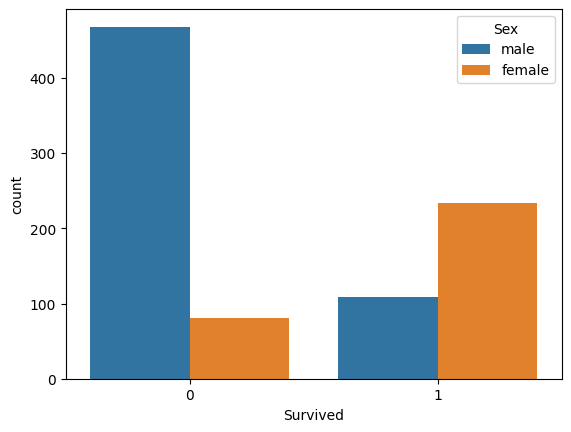

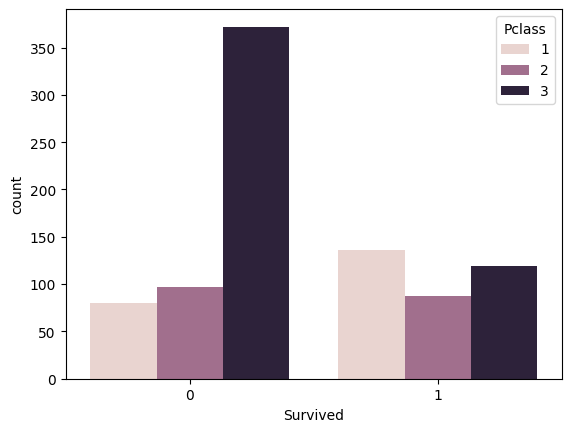

In [ ]:
#survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.show()

# survival rate by class
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.show()

In [ ]:
#create visualization plots tomvisualize the distribution and relationship between features


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

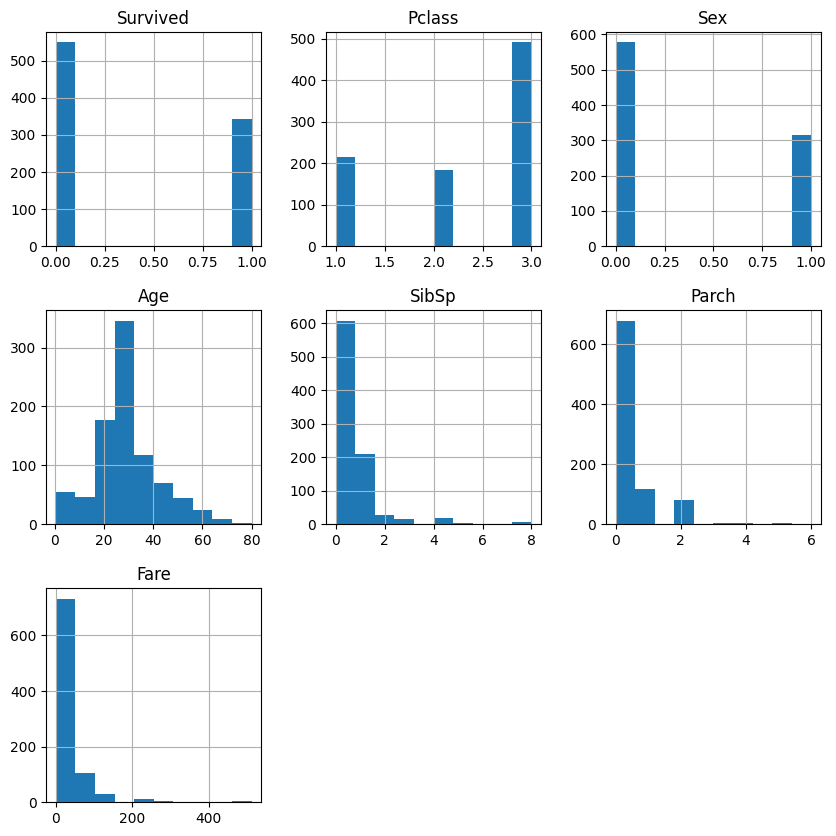

In [ ]:
train_df.hist(figsize=(10, 10))

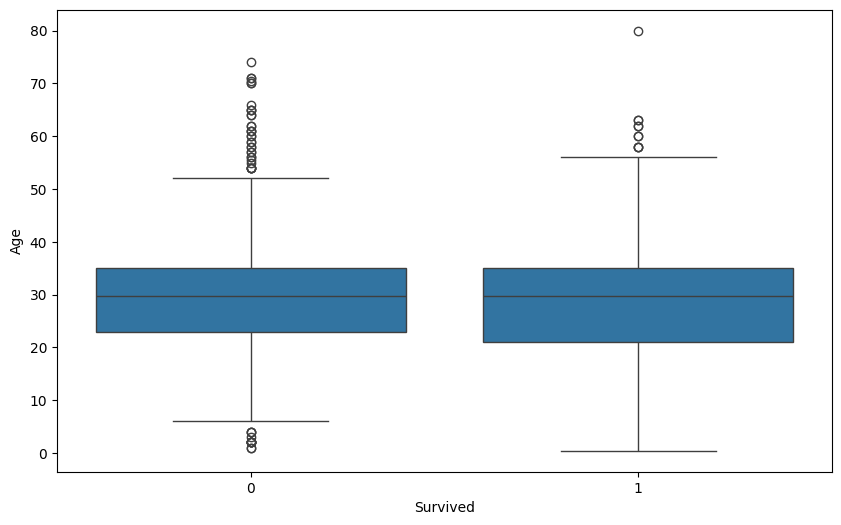

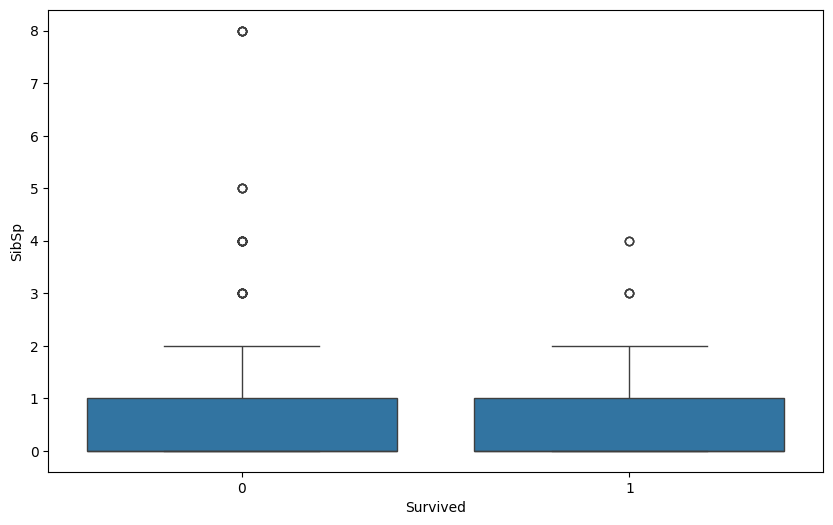

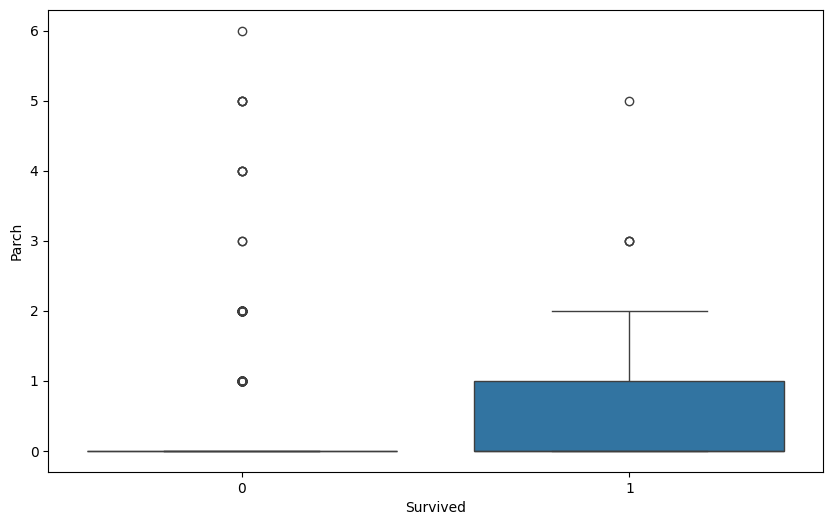

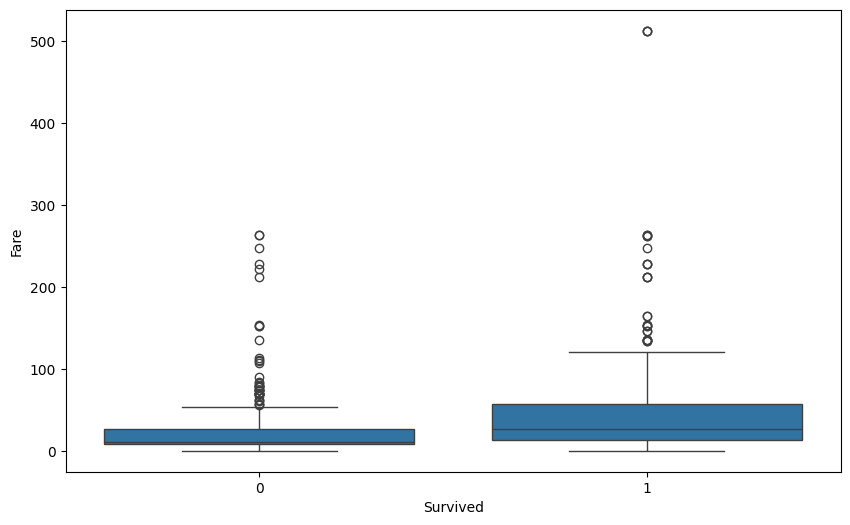

In [ ]:
#boxplot for the nuerical features vs target (if'survived' is present in train_df)
if 'Survived' in train_df.columns:
    numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Survived', y=feature, data=train_df)

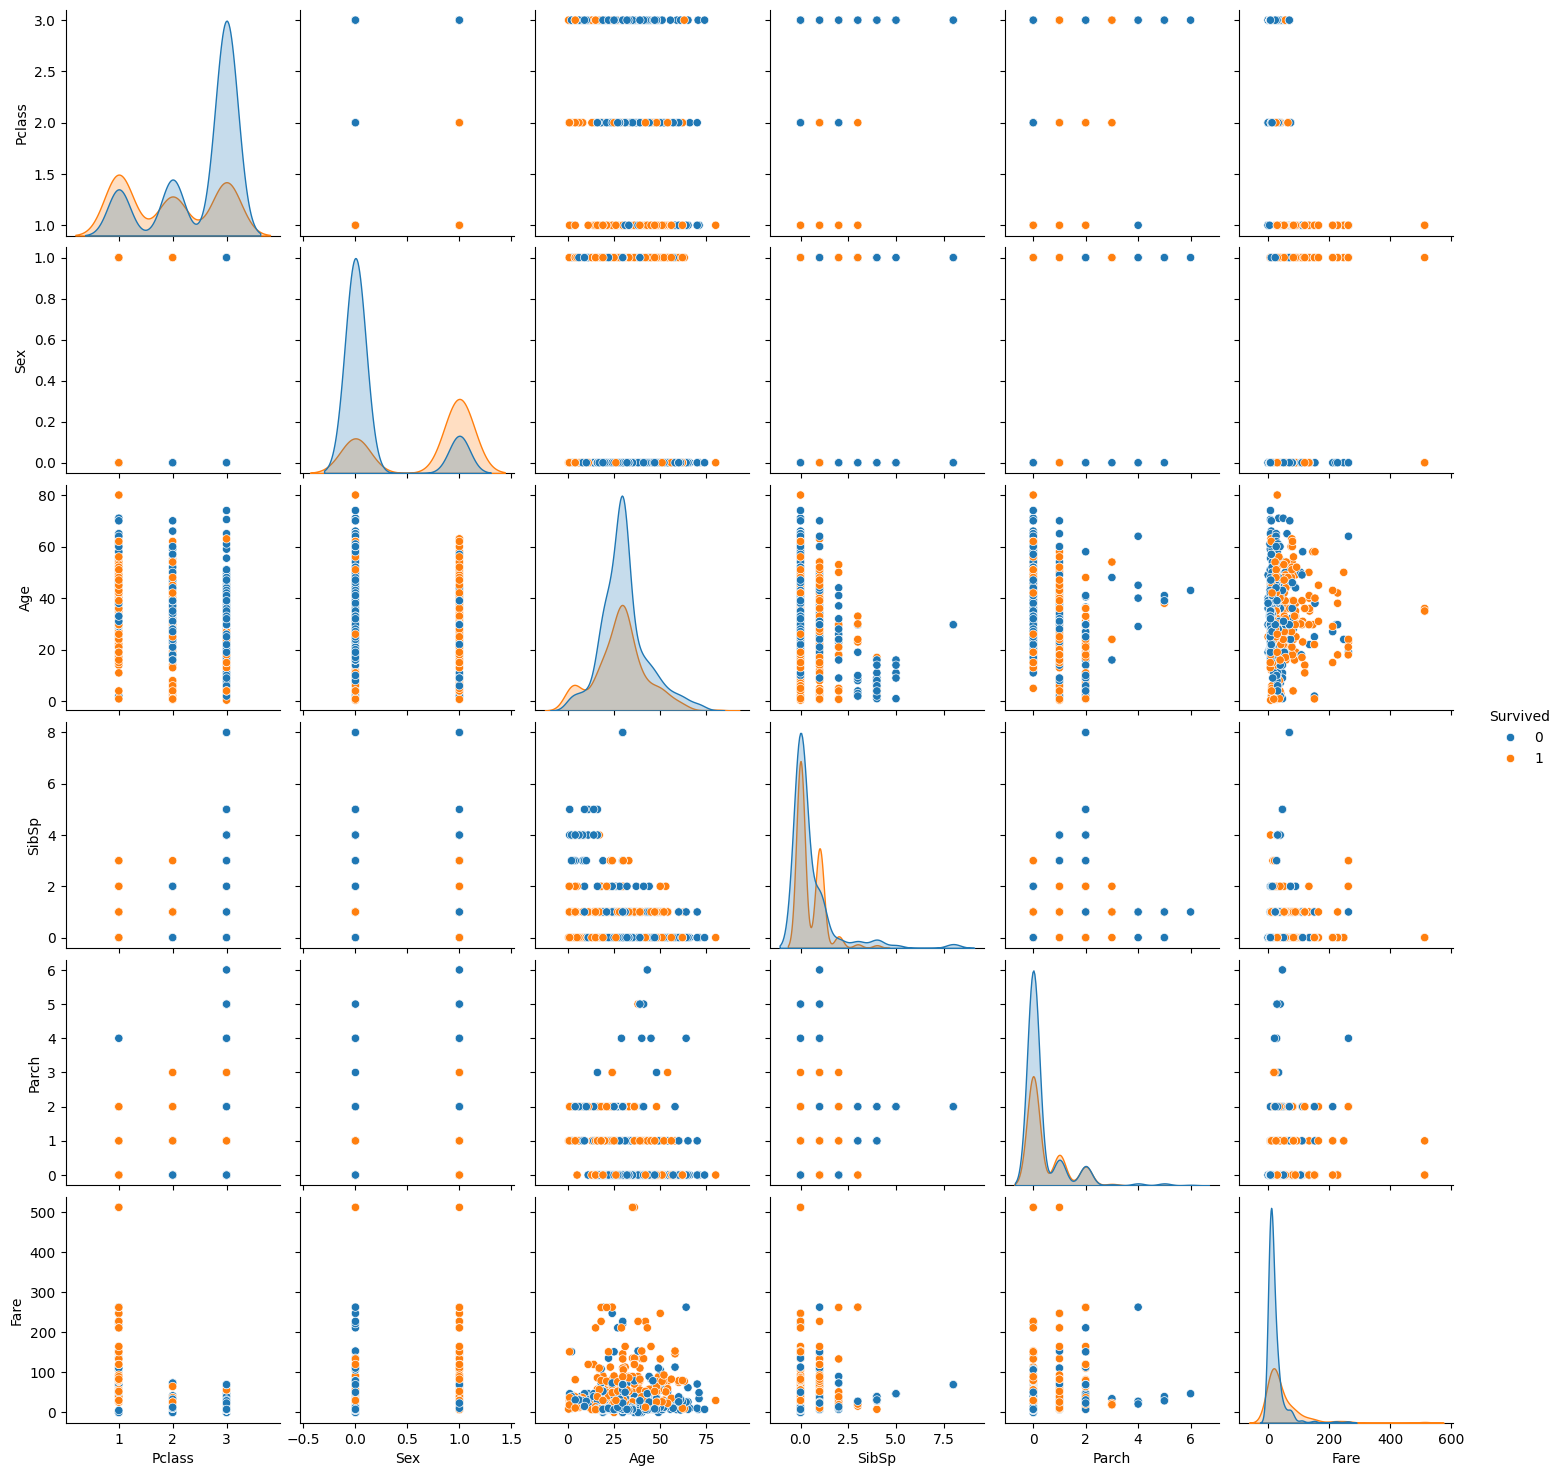

In [ ]:
pairplot = sns.pairplot(train_df, hue='Survived')

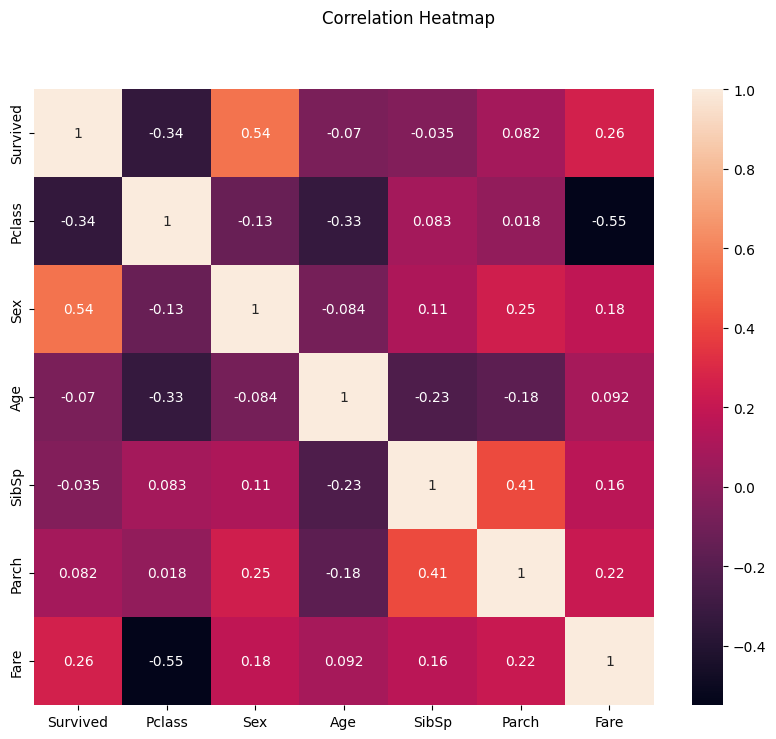

In [ ]:
#correlation haet map
correlation_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,)
plt.suptitle('Correlation Heatmap')
plt.show()

In [ ]:
# analyzing any pattern or correlation observed in the data


From the histograms, we can see that most passengers were in the younger age group, and Fare distribution is highly right-skewed, meaning only a few people paid very high ticket prices.

The boxplots show clear differences: passengers in 1st class (high fare) had better survival chances compared to those in lower classes. Similarly, survival rates were slightly higher among younger passengers.

In the pairplot, we notice that survivors are more concentrated in lower Pclass values (1st/2nd class) and with moderately higher fares.

The correlation heatmap highlights that Pclass and Fare are negatively correlated (as expected, higher class → lower Pclass value and higher fare). Also, Survived shows a mild positive correlation with Fare and a negative correlation with Pclass.


In [ ]:
# 2. DATA PREPROSSESING

In [ ]:
# handeling missing values
# encode categorical columns


#filling missing value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

#filling missing value embarked with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])




In [ ]:
train_df.isnull().sum()
test_df.isnull().sum()

#fare show one missing value to solve it
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [ ]:
#converting sex to nunber
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})



In [ ]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#droping columns of not usefull for module
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# One-hot encode the 'Embarked' column
x_train = pd.get_dummies(x_train, columns=['Embarked'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Embarked'], drop_first=True)

In [ ]:
train_df.head()
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null

In [ ]:
#spliting features and lables

x=train_df.drop('Survived', axis=1)
y=train_df['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# 3 .MODEL BUILDING

# building a logiccal regressingmodel using approprate libraries
# train the model using training data

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# 4 . MODEL EVALUATION

#PREDICTION

y_pred = log_model.predict(x_test)

y_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_df.head()

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1


In [ ]:
# confussion matrix for the accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]])

In [ ]:
print("accuracy=" + str(((90+55)/(90+ 15 +19+ 55))*100))
#accuracy of thr model is 81%

accuracy=81.00558659217877


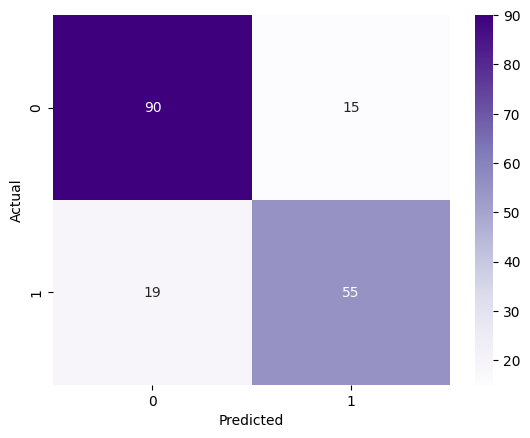

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)



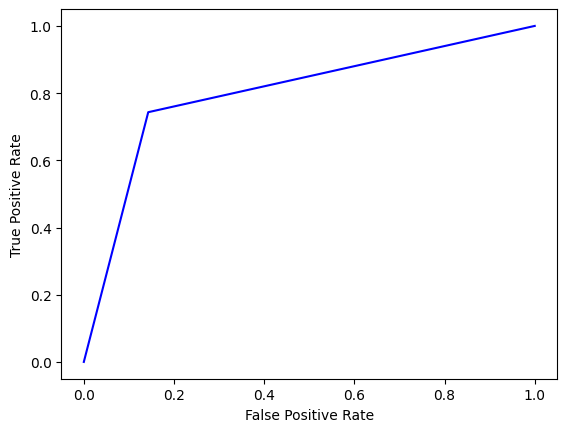

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
auc=roc_auc_score(y_test, y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='Blue')
plt.plot([0.1],[0.1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc

<function sklearn.metrics._ranking.auc(x, y)>

In [ ]:
# 5. INTERPRETITION:

# interpret the coefficient of the logistic regression model.

Interpret the coefficients of the logistic regression model

In logistic regression, each coefficient shows how much a one-unit increase in that feature changes the log-odds of survival.

Positive coefficient → increases survival probability.

Negative coefficient → decreases survival probability.

 Titanic dataset :

Sex (female) usually has a positive coefficient → being female increased the odds of survival.

Pclass (3rd class) usually has a negative coefficient → being in lower class decreased survival odds.

Age might have a negative coefficient → older passengers had lower chances of survival.

Fare often has a positive coefficient → higher ticket price (wealthier passengers) increased survival odds.

In [ ]:
# Discuss the signification of features in predicting the target variable (survival probability in this case).

the logistic regression model shows that gender (being female), passenger class, and age were the most significant predictors of survival. A positive coefficient for “female” means women had a much higher chance of survival. Higher class passengers (1st class) were also more likely to survive, while those in 3rd class had reduced survival chances. Age showed a negative effect, suggesting that younger passengers had better survival odds. Fare also contributed positively, meaning passengers who paid higher fares were slightly more likely to survive. Overall, gender and class were the strongest features in predicting survival.

6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.




In [ ]:
https://ujjwalaalpuria.streamlit.app/

INTERVIEW QUESTION

1. What is the difference between precision and recall ?

Answer  - Precision and Recall are evaluation metrics used for classification problems.

Precision measures how many of the predicted positives are actually correct.

𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
	​


It answers: When the model says "positive," how often is it right?

Recall measures how many of the actual positives the model correctly identified.

𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
	​


2. What is cross-validation, and why is it important in binary classification?

Answer

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple parts (called “folds”). The model is trained on some folds and tested on the remaining fold, and this process is repeated several times. The final performance is the average of all runs.

Why it’s important in binary classification

Avoids overfitting – Ensures the model generalizes well to unseen data instead of just memorizing the training set.

Reliable performance estimate – Instead of depending on a single train-test split, it uses multiple splits, giving a more robust estimate of metrics like accuracy, precision, recall, F1-score, and AUC.

Better use of data – Since every data point is used for both training and testing (in different folds), it maximizes the usage of limited datasets.

Model selection & tuning – Helps compare different models or hyperparameters fairly by using consistent evaluation across folds